<a href="https://colab.research.google.com/github/sushil1902/Projects/blob/Proj/Predict__hotel_booking_cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Prediction of hotel booking cancellation </center></h1>

# 1. Importing package  and loading of Data

In [1]:
# Importing packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
#------------------------------------------
# Importing visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
#--------------------------------------------
# Import preprocessing of packages
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

# Import from Model selelection
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

# Load Linear model
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier

# Load feature selction
from sklearn.feature_selection import SelectFromModel, SelectPercentile

# Load metrcis
from sklearn.metrics import f1_score, confusion_matrix

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/sushil1902/Datasets/main/hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Data Type :
* Categorical - hotel, is_canceled, customer_type, is_repeated_guest, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, agent, company, reservation_status,
* Numerical - lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, booking_changes, previous_bookings_not_canceled, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests
* Ordinal - arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, reservation_status_date


In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Missing values

1. children -- 4
2. country --- 488
3. agent ---- 16340
4. company --- 112593

In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


* The following columns **previous_cancellations**, **previous_bookings_not_canceled**, **booking_changes days_in_waiting_list**, **required_car_parking_spaces**, t**otal_of_special_requests **have only a **maximum value**. This shows that these **features contribute **to the decision of cancellation only in very few cases.

# Asumption towards contribution of feature
* **Target Variable**  : is_canceled
* **High contributors** : hotel, lead_time, arrival_date_year, arrival_date_month, stays_in_weekend_nights, stays_in_week_nights, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, deposit_type, days_in_waiting_list, customer_type

* **Medium contributors**: children, babies, distribution_channel, booking_changes, adr

* **Low contributors**: arrival_date_week_number, arrival_date_day_of_month,country, meal, adults, market_segment, agent, company, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date

In [7]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **Assumption about cancellation**

1. **Hotel type** : City hotel has higher cancellation than resort hotel . City hotels uses- regular customer but resort hotel uses for family vacation.
2. The earlier the booking made, higher the chances of cancellation.
3. Customers who have bookings for longer durations have lesser chance of cancelling their booking.
4. As more children or babies are involved in the booking, higher chances of cancellation.
5. Old guest (is_repeated_guest=1) is less likely to cancel current booking.
6. If there are high previous cancellations, possibility of cancellation of current booking is also high.
7. If room assigned is not the same as reserved room type, customer might positively cancel the booking.
8. Higher the number of changes made to the booking, lesser is the chance of cancellation due to the investment of time in curating the booking as per one's requirement.
9. Bookings that are refundable or for which deposits were not made at the time of booking stand a high chance of cancelation.
10. If the number of days in waiting list is significant, customer might make some other booking due to uncertainty of confirmation of current booking.


# EDA


# 1. Checking the % of cancellation

            len(is_canceled ==yes)/len(data)*100

In [8]:
print("% of cancellation = ", len(data[data['is_canceled']==1])/len(data))
data['reservation_status'].value_counts()

% of cancellation =  0.37041628277075134


Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [9]:
data['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

# 2. Check the correalation among features

In [10]:
corr = data.corr(method='pearson')['is_canceled']
print(corr)

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64


* **Highest +ve correlation** : lead_time | previous_cancellations
* **Highest -ve correlation** : booking_changes  | required_car_parking_spaces | total_of_special_requests

Cancellation in Resort Hotel =  0.27763354967548676
Cancellation in City Hotel =  0.41726963317786464


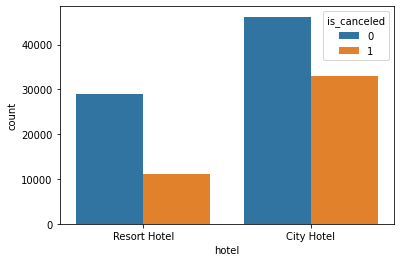

In [11]:
# countplot of cancellation of diffierent types of hotel
sns.countplot(data= data,x='hotel',hue='is_canceled')

# Number of hotel cancelled in diffierent types of hote
resort_canceled =  data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==1)]
city_canceled = data[(data['hotel']=='City Hotel') & (data['is_canceled']==1)]

# % of cancellation in each type of hotel
print('Cancellation in Resort Hotel = ', (len(resort_canceled))/ (len(data[data['hotel']=='Resort Hotel'])))
print('Cancellation in City Hotel = ', (len(city_canceled))/ (len(data[data['hotel']=='City Hotel'])))

* **Observation** : City hotel has 41.72% cancellation and Resort hotel has 27.76 %

# Cancellation of hotel using lead_time

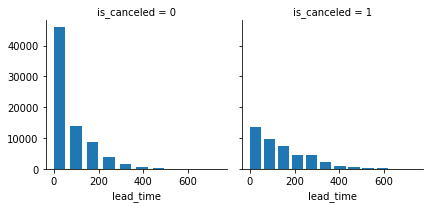

In [12]:
grid = sns.FacetGrid(data, col='is_canceled')
grid.map(plt.hist, 'lead_time', width=50)
grid.add_legend()

* **Observations** : Maximum cancelations occur if the booking is made 60-70 days before the checkin date. Longer the lead_time, lower is the cancelation. 

In [13]:
print(len(data[(data['stays_in_weekend_nights']==0) & (data['stays_in_week_nights']==0)])) 

715


* **Observations** : 715 bookings don't have both weekday or weekend nights which could be ar error in the data as this is not possible in real life scenario. Therefore these rows can be eliminated from the dataset.

# **Assumption 4** : As more children or babies are involved in the booking, higher chances of cancellation.

# Total number of booking having children or babies

In [14]:
print('Number of children or babies present in data set',len(data.loc[(data['children']!=0) |(data['babies']!=0)]))
print('Length of dataset',len(data))

Number of children or babies present in data set 9336
Length of dataset 119390


In [15]:
((len(data.loc[(data['children']!=0) | (data['babies']!=0)]))/(len(data))) * 100

7.819750397855767

**Observation** : 
1. The customers haveing child or babies is only 8 % which  will play significant role.
2. Assumption 4 can be discarded.


# **Assumption 5** : Old guest (is_repeated_guest=1) is less likely to cancel current booking.

In [16]:
data['is_repeated_guest'].dtypes

dtype('int64')

In [17]:
data['is_repeated_guest'].unique()

array([0, 1])

In [18]:
# number of new guest
new_guest = data[(data['is_repeated_guest']==0) & (data['is_canceled']==1)]
print("Total Number of new guest : ",len(new_guest))
# number of old guest
old_guest =data[(data['is_repeated_guest']==1) & (data['is_canceled']==1)]
print("Total Number of old guest : ",len(old_guest))

# % of cancellation of from new guest and old guest
print('Cancellation % from new guest : ',(len(new_guest))/(len(data[data['is_repeated_guest']==0])))
print('Cancellation % from old guest : ',(len(old_guest))/(len(data[data['is_repeated_guest']==1])))

Total Number of new guest :  43672
Total Number of old guest :  552
Cancellation % from new guest :  0.3778508392455442
Cancellation % from old guest :  0.14488188976377953


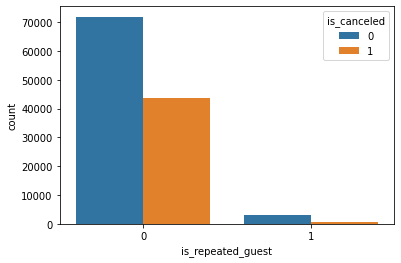

In [19]:
sns.countplot(data=data,x='is_repeated_guest', hue = 'is_canceled')

Observations : 
1. Maximum guests are new costomer and which have maximum cancellation. Cancellation from new guest is 37.78 %
2. Cancellation from old guest is 14.48 % .
3. Hence, old customer is loyal and have less cancellation and our assumption is right and hold valid. 

# **Asumption 6** : If there are high previous cancellations, possibility of cancellation of current booking is also high.

In [20]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [21]:
data['previous_cancellations'].dtypes

dtype('int64')

In [22]:
data['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

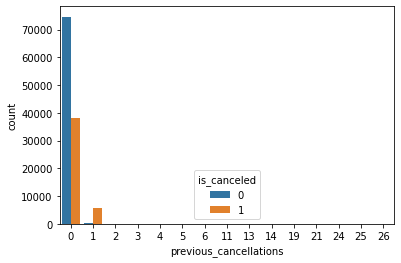

In [23]:
sns.countplot(data=data ,x ='previous_cancellations',hue ='is_canceled')

**Observations** :
1. Maximum customers have 0 previous cancellations. 
2. They are less likely to cancel the current booking. 
3. However, customers who have cancelled once earlier are more likely to cancel the current booking. 
4. This also matches with the positive correlation between previous_cancellations and is_cancelled and supports Assumption 6.

# Assumptions 7 : If room assigned is not the same as reserved room type, customer might positively cancel the booking.

In [24]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [25]:
data['reserved_room_type'].dtypes

dtype('O')

In [26]:
data['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [27]:
data['assigned_room_type'].dtypes

dtype('O')

In [28]:
data['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [29]:
room_type  = data.loc[data['reserved_room_type']!= data['assigned_room_type']]
room_type['is_canceled'].value_counts()

0    14115
1      802
Name: is_canceled, dtype: int64

In [30]:
room_type['is_canceled'].value_counts(normalize=True)*100

0    94.623584
1     5.376416
Name: is_canceled, dtype: float64

Observations : 

1. When assigned room type is different from reserved room type due to which cancellation is only 5 % 
2. Our assumption is wrong 

# Assumption 8 : Higher the number of changes made to the booking, lesser is the chance of cancellation due to the investment of time in curating the booking as per one's requirement.

In [31]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [32]:
data.corr(method='pearson')['is_canceled']['booking_changes']

-0.144380991061528

In [33]:
data['booking_changes'].dtypes

dtype('int64')

In [34]:
data['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

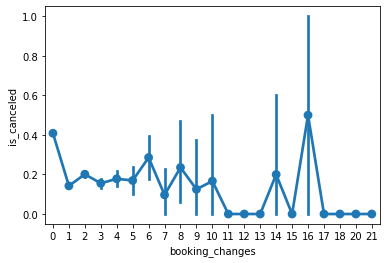

In [35]:
sns.pointplot(data= data,x = 'booking_changes', y = 'is_canceled')

**Observation** : 
1. There is no correlation between is_canceled and booking changes .
2. There is no impact on cancellation


# Assumption 9 : Bookings that are refundable or for which deposits were not made at the time of booking stand a high chance of cancelation.

In [36]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [37]:
data['deposit_type'].dtypes

dtype('O')

In [38]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

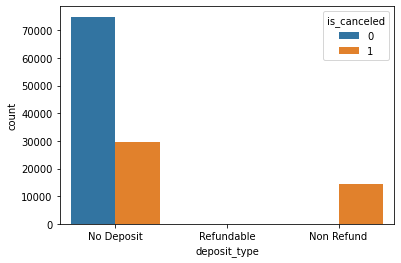

In [39]:
sns.countplot(data = data ,x='deposit_type',hue ='is_canceled')

Observation: Non refundable booking are also cancelled.

# Observation 10 : If the number of days in waiting list is significant, customer might make some other booking due to uncertainty of confirmation of current booking.

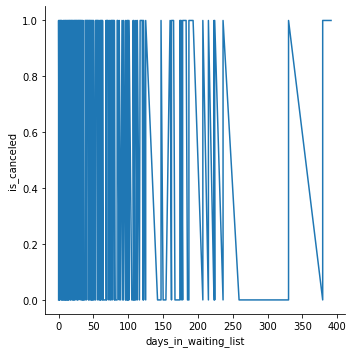

In [40]:
sns.relplot(data=data, x='days_in_waiting_list', y='is_canceled', kind='line', estimator=None)

**Observations** : No relation between is_canceled and days_in_waiting_list

# Relation between arrival_day_month ans is_canceled

In [41]:
data['arrival_date_month'].dtypes
# Categorical--object

dtype('O')

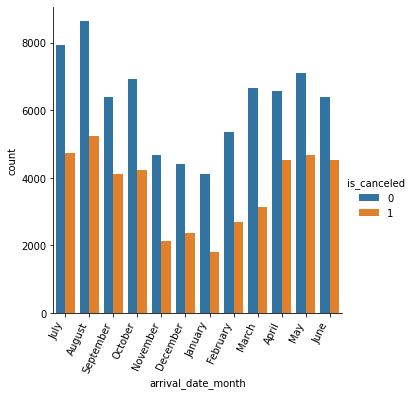

In [42]:
 cat_plot = sns.catplot(data= data,x="arrival_date_month",hue='is_canceled',kind ='count')
 cat_plot.set_xticklabels(rotation= 65,horizontalalignment= 'right')

# Relation between arrival_day_year ans is_canceled

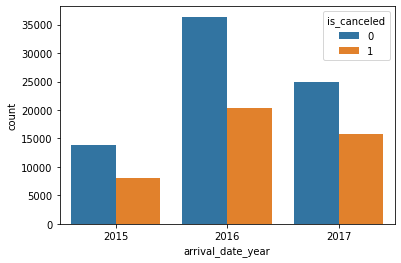

In [43]:
sns.countplot(data=data,x='arrival_date_year',hue = 'is_canceled')

**Observation** :  Maximum booking in  year 2016 in months of july and august

# Yearwise and monthwise cancelation 

In [44]:
# Year wise count and %
year_count = data.groupby(['arrival_date_year', 'is_canceled']).size().to_frame(name='count')
year_perct = year_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(year_perct)

                                   count
arrival_date_year is_canceled           
2015              0            62.984179
                  1            37.015821
2016              0            64.136703
                  1            35.863297
2017              0            61.302136
                  1            38.697864


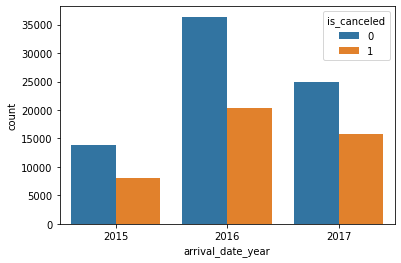

In [45]:
sns.countplot(data= data,x='arrival_date_year',hue ='is_canceled' )

In [46]:
# Monthswise count and %
month_count = data.groupby(['arrival_date_month',"is_canceled"]).size().to_frame(name= 'count')
month_perct = month_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(month_perct)

                                    count
arrival_date_month is_canceled           
April              0            59.202814
                   1            40.797186
August             0            62.246883
                   1            37.753117
December           0            65.029499
                   1            34.970501
February           0            66.584036
                   1            33.415964
January            0            69.522685
                   1            30.477315
July               0            62.546402
                   1            37.453598
June               0            58.542828
                   1            41.457172
March              0            67.847662
                   1            32.152338
May                0            60.334153
                   1            39.665847
November           0            68.766559
                   1            31.233441
October            0            61.953405
                   1            38

**Observations** : Percentage of cancellations was higher in 2015 and 2017 despite higher number of bookings in 2016. April and June had the largest cancellations overall.

# Impact of market segment on cancellation

In [47]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [48]:
data['market_segment'].dtypes

dtype('O')

In [49]:
data['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

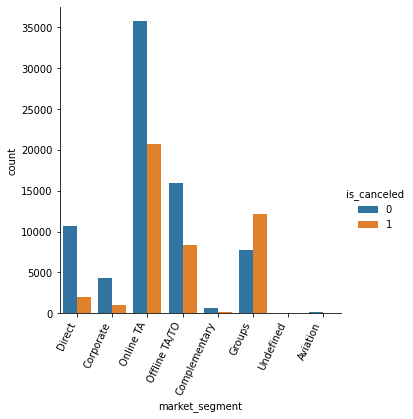

In [50]:
market_contributors = sns.catplot(data = data, x= 'market_segment', hue = 'is_canceled', kind='count')
market_contributors.set_xticklabels(rotation= 65,horizontalalignment= 'right')

**Observations** : Maximum booking and cancelation is through online and offline travel agency and tour operators

# How customer type is associated with cancelation of hotel

In [51]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [52]:
data['customer_type'].dtypes

dtype('O')

In [53]:
data['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [54]:
data['customer_type'].value_counts(normalize=True)*100

Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: customer_type, dtype: float64

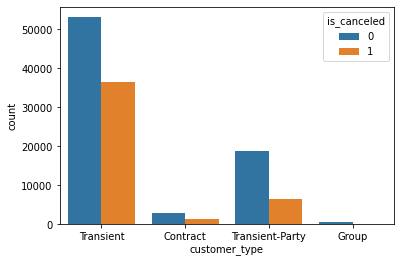

In [55]:
sns.countplot(data=data,x = 'customer_type',hue='is_canceled')

**Observations** : 75 % of booking is through transient and 21% through transient party

# How distribution channel is associated with cancelation

In [56]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [57]:
data['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [58]:
data['distribution_channel'].dtypes

dtype('O')

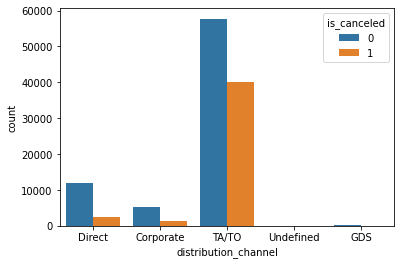

In [59]:
sns.countplot(data=data, x='distribution_channel', hue='is_canceled')

**Observation** : Major contributors is Travel agent and tour operators

# Multivariate analysis of Data

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


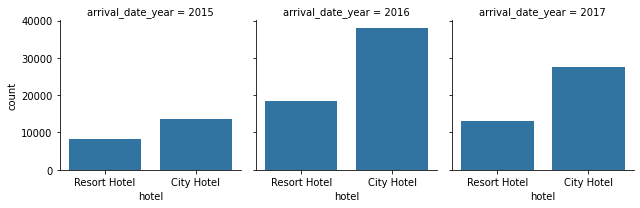

In [60]:
g = sns.FacetGrid(data,col='arrival_date_year')
g.map(sns.countplot,'hotel')

**Observations** : City hotel has more booking than resort hotel 

# How meal and customer type are related

In [67]:
data['meal'].unique(),data['customer_type'].unique()

(array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object),
 array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object))

In [68]:
data['meal'].nunique(),data['customer_type'].nunique()

(5, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


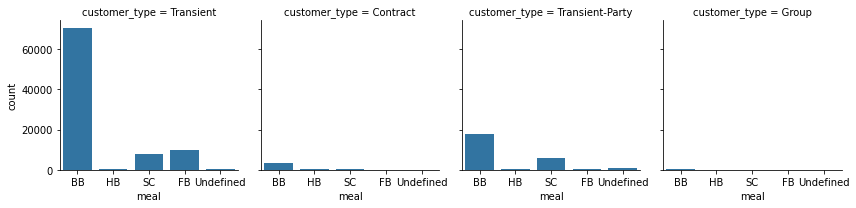

In [69]:
g1 = sns.FacetGrid(data,col='customer_type')
g1.map(sns.countplot,'meal')

**Observation**:  Transient customer with Breakfast is major.


# How Reserved room type is associted with hotel

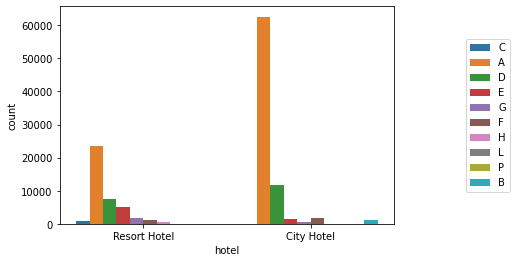

In [73]:
g = sns.countplot(data= data,x='hotel',hue ='reserved_room_type')
g.legend(loc= 'center left',bbox_to_anchor = (1.20,0.5),ncol = 1)

**observations** : 
* Resort hotels room preference : A, D, E
* City hotels room preference : A, D, F

In [74]:
print("TABLE")
print(data.groupby(['hotel', 'customer_type']).size())

TABLE
hotel         customer_type  
City Hotel    Contract            2300
              Group                293
              Transient          59404
              Transient-Party    17333
Resort Hotel  Contract            1776
              Group                284
              Transient          30209
              Transient-Party     7791
dtype: int64


In [75]:
print(data.groupby(['customer_type', 'deposit_type']).size())

customer_type    deposit_type
Contract         No Deposit       3530
                 Non Refund        544
                 Refundable          2
Group            No Deposit        569
                 Refundable          8
Transient        No Deposit      76684
                 Non Refund      12909
                 Refundable         20
Transient-Party  No Deposit      23858
                 Non Refund       1134
                 Refundable        132
dtype: int64


In [77]:
print(data.groupby(['customer_type', 'distribution_channel']).size())
print("-"*60)
print(data.groupby(['customer_type', 'market_segment']).size())

customer_type    distribution_channel
Contract         Corporate                  27
                 Direct                     19
                 TA/TO                    4030
Group            Corporate                  31
                 Direct                    116
                 TA/TO                     430
Transient        Corporate                4157
                 Direct                  12343
                 GDS                       193
                 TA/TO                   72919
                 Undefined                   1
Transient-Party  Corporate                2462
                 Direct                   2167
                 TA/TO                   20491
                 Undefined                   4
dtype: int64
------------------------------------------------------------
customer_type    market_segment
Contract         Complementary         2
                 Corporate            22
                 Direct               14
                 Groups     

In [78]:
group = data.groupby(['customer_type', 'reservation_status']).size()
group_pcts = group.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
group_pcts

customer_type    reservation_status
Contract         Canceled              30.323847
                 Check-Out             69.038273
                 No-Show                0.637880
Group            Canceled               9.532062
                 Check-Out             89.774697
                 No-Show                0.693241
Transient        Canceled              39.678395
                 Check-Out             59.253680
                 No-Show                1.067925
Transient-Party  Canceled              24.554211
                 Check-Out             74.570132
                 No-Show                0.875657
dtype: float64

In [79]:
data.pivot_table(columns='hotel', values=['stays_in_weekend_nights', 'stays_in_week_nights'], aggfunc=lambda x:x.sum())

hotel,City Hotel,Resort Hotel
stays_in_week_nights,173174,125337
stays_in_weekend_nights,63082,47664


In [80]:
data.pivot_table(columns='hotel', values='total_of_special_requests', aggfunc=lambda x:x.sum())

hotel,City Hotel,Resort Hotel
total_of_special_requests,43387,24828


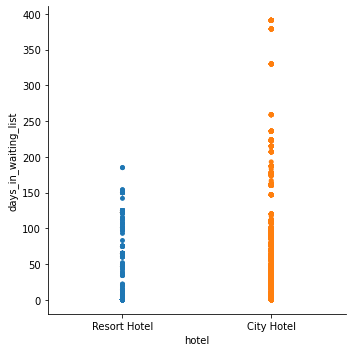

In [82]:
sns.catplot(data=data, x='hotel', y='days_in_waiting_list', jitter=False)

In [84]:
data['country'].value_counts(normalize=True)*100

PRT    40.865587
GBR    10.200838
FRA     8.759314
ESP     7.205934
DEU     6.128576
         ...    
BDI     0.000841
UMI     0.000841
MRT     0.000841
CYM     0.000841
SLE     0.000841
Name: country, Length: 177, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


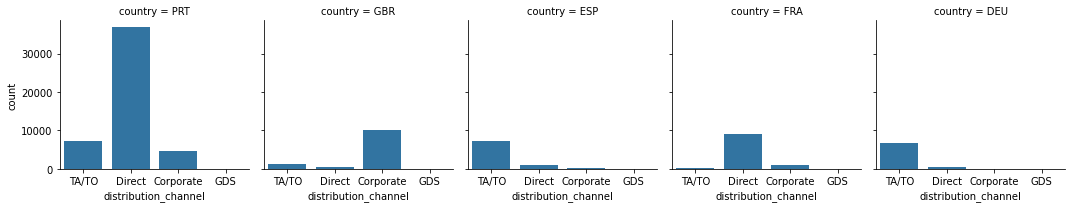

In [86]:
temp = data.loc[(data['country']=='PRT') | (data['country']=='GBR') | (data['country']=='FRA') | (data['country']=='ESP') | (data['country']=='DEU')]
grid = sns.FacetGrid(temp, col='country')
grid.map(sns.countplot, 'distribution_channel')

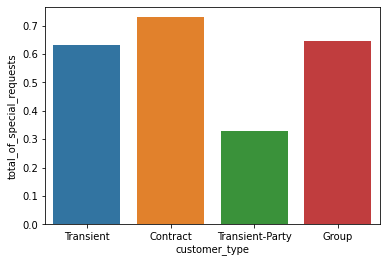

In [88]:
sns.barplot(data=data, x='customer_type', y='total_of_special_requests', ci=None)

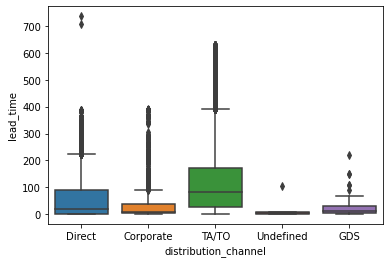

In [89]:
sns.boxplot(data=data, x='distribution_channel', y='lead_time')

# Feature Engineering

In [91]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 
             'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
data.arrival_date_month = data.arrival_date_month.map(month_map).astype(int)

In [99]:
data['arrival_date'] = data['arrival_date_year'].astype(str) + '-'+ data['arrival_date_month'].astype(str) + '-' + data['arrival_date_day_of_month'].astype(str)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [101]:
data['children'] = data['children'].fillna(0)
data['offspring'] = (data['children'] + data['babies']).astype(int)

In [103]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

data['change_in_room'] = data.apply(roomChange, axis=1)

In [105]:
data['total_bookings'] = data['previous_cancellations'] + data['previous_bookings_not_canceled']

In [107]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [108]:
data['country'].fillna(data['country'].mode()[0], inplace = True)

In [109]:
data['agent'].fillna(data['agent'].mode()[0], inplace = True)
data['company'].fillna(data['company'].mode()[0],inplace = True)

In [110]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [111]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [113]:
for i in range(len(data)):
    if data.loc[i, 'country'] == 'PRT':
        data.at[i, 'country'] = 1
    elif data.loc[i, 'country'] == 'GBR':
        data.at[i, 'country'] = 2
    else:
        data.at[i, 'country'] = 0

In [114]:
data['arrival_date'] = pd.to_datetime(data['arrival_date'])
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int64         
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [116]:
data['stay_duration'] = data['reservation_status_date'] - data['arrival_date']
data['stay_duration'] = data['stay_duration'] / np.timedelta64(1, 'D')
data['stay_duration'] = data['stay_duration'].astype(int)

In [117]:
for i in range(len(data)):
    if data.loc[i, 'stay_duration']<0:
        data.at[i, 'stay_duration'] = -1

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int64         
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [119]:
print(data.dtypes == object)

hotel                              True
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                               True
country                            True
market_segment                     True
distribution_channel               True
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                 True
assigned_room_type                 True
booking_changes                   False
deposit_type                       True
agent                             False
company                           False


In [120]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']

for item in var:
  data[item] = lb.fit_transform(data[item])

data = pd.get_dummies(data, columns=['hotel', 'customer_type', 'deposit_type', 
                                     'change_in_room', 'market_segment', 'distribution_channel', 'country'])

In [121]:
data.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 
           'reservation_status_date', 'arrival_date'], axis=1, inplace=True)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  is_repeated_guest               119390 non-null  int64  
 12  previous_cancell

# Model AND Result

# Train and Test Split

In [123]:
train_var = data.drop(['is_canceled'],axis= 1)
test_var = data['is_canceled']
X_train,X_test,y_train,y_test = train_test_split(train_var,test_var,test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((95512, 50), (95512,), (23878, 50), (23878,))

# Data Scaling

In [126]:
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

#------------------------------------------------------------
mm_scaler = MinMaxScaler()
X_train_mm = mm_scaler.fit_transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

# Applying Logistic Regression

In [127]:
# Fitting the logistic model
logreg = LogisticRegression(max_iter=500).fit(X_train_mm,y_train)

scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)

logreg_pred = logreg.predict(X_test_mm)


In [128]:
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(confusion_matrix(y_test, logreg_pred))

Average cross validation score: 0.991
Test accuracy: 0.993
F1 score: 0.990
[[15122    17]
 [  162  8577]]


In [134]:
print(logreg_pred)

[0 1 1 ... 0 1 0]


In [136]:
prediction = pd.DataFrame(logreg_pred, columns=['is_canceled']).to_csv('submission.csv',index = False, header = False)